### Deep Neural Networks

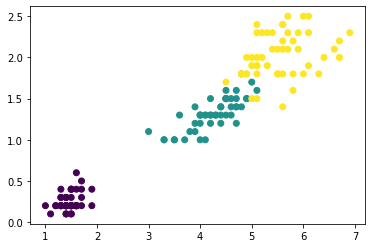

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt 

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = iris.target

plt.scatter(X[:,0],X[:,1],c=y)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Let's build our first neural network. You will have to choose a Tensorflow kernel on OOD.

We will use Keras implemented onto Tensorflow.

Keras: https://keras.io/

Tensorflow: https://www.tensorflow.org/

In [3]:
import tensorflow.keras as keras

# Initialize a model.
model = keras.models.Sequential()

# Add the input layer and specifying its shape.
model.add(keras.layers.Input(shape=X_train.shape[1])) ## add a layer, need input layer first. We have 2 features so need x1 and x2. X_train.shape[1] will give us 2

# Add the first hidden layer with 1000 neurons and the ReLU activation function.
model.add(keras.layers.Dense(1000, activation='relu')) ## add a hidden layer, call it dense. 1000 neurons using relu

# Add the second hidden layer with 1000 neurons and the ReLU activation function.
model.add(keras.layers.Dense(1000, activation='relu')) ## another hidden layer

# Add the output layer
model.add(keras.layers.Dense(np.unique(y).shape[0], activation='softmax'))
## output layer, how many features are there

2021-11-18 11:58:51.930713: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:/opt/slurm/lib64:
2021-11-18 11:58:51.930761: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-18 11:58:51.930786: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c0704a-s7.ufhpc): /proc/driver/nvidia/version does not exist
2021-11-18 11:58:51.931030: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
np.unique(y).shape[0]

3

3 features all connected 

### We can use the following syntax instead.

In [5]:
model = keras.models.Sequential()

# This line combines the input layer and the first hidden layer.
model.add(keras.layers.Dense(1000, input_dim=X_train.shape[1], activation='relu')) ## can combine first hidden layer with input layer
## can also use input dimension instead of what we did above
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(np.unique(y).shape[0], activation='softmax'))

### We can also use the following syntax.

In [6]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1]),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu',),
    keras.layers.Dense(np.unique(y).shape[0], activation='softmax')
])
## can also put evrything in same bracket, all works

### Let's check the "architecture" of our neural network. Note that the input layer does not show up here.

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 3003      
Total params: 1,007,003
Trainable params: 1,007,003
Non-trainable params: 0
_________________________________________________________________


1st hidden layer 1000 neurons

2nd hidden 1000 neurons

output layer 3 neurons 

total ~1 million parameters 

### We can also have a look at the weights.

In [7]:
model.weights ## shape=(2,1000) 2 features 1000 neurons 

[<tf.Variable 'dense_6/kernel:0' shape=(2, 1000) dtype=float32, numpy=
 array([[ 0.0061527 ,  0.06774743, -0.07542983, ..., -0.01343764,
         -0.00240877,  0.03150436],
        [-0.03755854,  0.0462527 , -0.01792387, ..., -0.058469  ,
         -0.03261517, -0.01701734]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(1000,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 

### Now, we need to "compile" the model before we fit to the data.

Some useful links

Loss functions: https://keras.io/api/losses/ 

Optimizers: https://keras.io/api/optimizers/ 

Metrics: https://keras.io/api/metrics/

In [9]:
## now need to complie the model
## specify what kind of loss function - here sparse categorical 
## optimizer, how learning rate changes 
## use accuracy for this 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

### We are ready to train our first neural network. Let's start training!

In [10]:
# history will record the loss, accuracy, etc. 
# validation_split will split the training dataset into training + validation datasets. 

## train the data seets for 100 epochs. Leave test data seet for training at very end when model is built and we're satisfied
## need so sepparate training set again so we can validate with other half, we pu 20% of training data set into validation
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

2021-11-18 12:03:36.710683: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
3/3 [==============================] - 0s 67ms/step - loss: 1.1828 - accuracy: 0.3438 - val_loss: 1.1745 - val_accuracy: 0.2917
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 1.0892 - accuracy: 0.3854 - val_loss: 1.3594 - val_accuracy: 0.2917
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 1.0042 - accuracy: 0.4479 - val_loss: 1.0152 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 0.8898 - accuracy: 0.6875 - val_loss: 0.8516 - val_accuracy: 0.8333
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.8645 - accuracy: 0.7188 - val_loss: 0.8109 - val_accuracy: 0.5417
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7954 - accuracy: 0.6250 - val_loss: 0.8269 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7427 - accuracy: 0.6979 - val_loss: 0.8331 - val_accuracy: 0.5417
Epoch 8/100
3/3 [===

### Let's evlauate the model using the test dataset.

In [11]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.16453972458839417
Test accuracy: 0.8999999761581421


### Let's check how loss and validation loss evolved over epoch.

Text(0, 0.5, 'loss, validation loss')

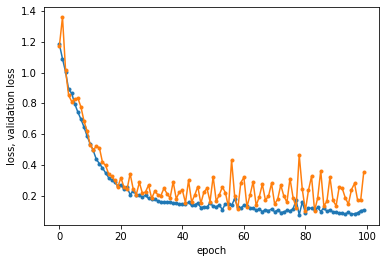

In [12]:
plt.plot(history.epoch, history.history['loss'],'.-')
plt.plot(history.epoch, history.history['val_loss'],'.-')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')

### Let's check how accuracy and validation accuracy evolved over epoch.

Text(0, 0.5, 'accuracy, validation accuracy')

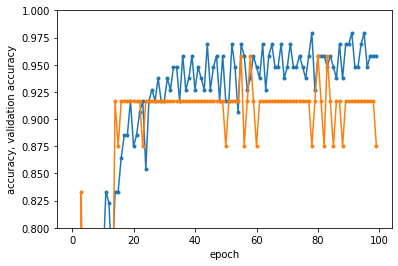

In [13]:
plt.plot(history.epoch, history.history['accuracy'],'.-')
plt.plot(history.epoch, history.history['val_accuracy'],'.-')
plt.ylim(0.8,1)
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')

### Let's check out weights and biases.

In [14]:
model.layers

In [15]:
hidden1 = model.layers[0] ## choose one of the layers, hidden1 is the first hidden layer 

In [16]:
hidden1.name ## can also call the layer, look back at model summary 

'dense_6'

### Let's put weights and biases of the first hidden layer in w1 and b1.

In [17]:
w1, b1 = hidden1.get_weights()

In [18]:
w1

array([[-0.00690275,  0.0264358 , -0.02882715, ...,  0.03434878,
         0.01585696,  0.03244706],
       [ 0.08173316,  0.02892908, -0.03079562, ..., -0.02884352,
        -0.06876779,  0.02762419]], dtype=float32)

In [19]:
w1.shape

(2, 1000)

In [20]:
b1

array([-6.42053857e-02, -7.91952759e-02,  0.00000000e+00,  0.00000000e+00,
        7.57031888e-02, -6.85660839e-02,  3.49648632e-02,  0.00000000e+00,
       -6.57209754e-02, -7.50431567e-02,  0.00000000e+00, -8.11794214e-03,
        0.00000000e+00,  9.51500535e-02,  7.69609138e-02,  6.44110888e-02,
        5.68806157e-02,  0.00000000e+00,  8.33069086e-02, -5.97795751e-03,
        8.62846896e-02,  0.00000000e+00, -8.63486677e-02,  4.98026572e-02,
       -6.88573420e-02, -6.68022260e-02,  6.96844757e-02, -6.72746822e-02,
       -7.74189383e-02, -7.35073835e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.71087280e-02, -8.46973807e-02,  0.00000000e+00,
       -7.18375966e-02,  4.52582836e-02, -4.15758900e-02,  0.00000000e+00,
       -5.90747148e-02,  6.86749816e-02,  0.00000000e+00,  8.73807073e-02,
        0.00000000e+00,  0.00000000e+00,  9.58880559e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.78683275e-02,
        0.00000000e+00,  

In [21]:
b1.shape

(1000,)

### We can save the model and then load it as needed.

In [22]:
model.save("iris_model_final.h5") ## makes a file named whatever

In [23]:
model_new = keras.models.load_model("iris_model_final.h5") ## we can load back our model

In [24]:
model_new.summary() ## same summary as before 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 3003      
Total params: 1,007,003
Trainable params: 1,007,003
Non-trainable params: 0
_________________________________________________________________


### Let's try a larger dataset = the MNIST dataset.

In [37]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

### Scale the images to 0 - 1.

In [38]:
X_train = X_train / 255.
X_test = X_test / 255.

### For now, let's use 10% of the data.

In [39]:
X_train = X_train[::10]
X_test = X_test[::10]

y_train = y_train[::10]
y_test = y_test[::10]

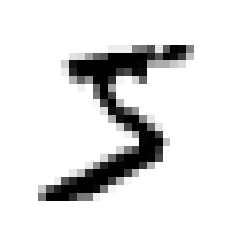

In [40]:
import matplotlib.pyplot as plt 

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

### TODO: Let's build a NN.

In [51]:
model = keras.models.Sequential()

# We need to flatten the 2d input arrays to 1d arrays.
# Add a hidden layer having 1000 neurons and ReLU.
# Add another hidden layer having 1000 neurons and ReLU.
# Add an output layer having "softmax" activation function. How many neurons do you need for this layer? 10

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Input(shape=X_train.shape[1]),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu',),
    keras.layers.Dense(np.unique(y_train).shape[0], activation='softmax')
])

### TODO: Print out the model summary and make sure things are correctly set up.

In [52]:
np.unique(y_train).shape[0]

10

In [53]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
input_7 (InputLayer)         multiple                  0         
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_22 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


### Compile the model. Let's first try Stochastic Gradient Descent with learning rate of 1.0e-3.

In [54]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

### TODO: Train the model using 100 epochs and 20 % of the data in the validation dataset.

In [55]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
150/150 [==============================] - 2s 12ms/step - loss: 2.2567 - accuracy: 0.2096 - val_loss: 2.2038 - val_accuracy: 0.2883
Epoch 2/100
150/150 [==============================] - 2s 12ms/step - loss: 2.1305 - accuracy: 0.4269 - val_loss: 2.0865 - val_accuracy: 0.4808
Epoch 3/100
150/150 [==============================] - 2s 11ms/step - loss: 2.0135 - accuracy: 0.5627 - val_loss: 1.9742 - val_accuracy: 0.5683
Epoch 4/100
150/150 [==============================] - 2s 12ms/step - loss: 1.8989 - accuracy: 0.6319 - val_loss: 1.8627 - val_accuracy: 0.6250
Epoch 5/100
150/150 [==============================] - 2s 11ms/step - loss: 1.7847 - accuracy: 0.6781 - val_loss: 1.7527 - val_accuracy: 0.6708
Epoch 6/100
150/150 [==============================] - 2s 12ms/step - loss: 1.6715 - accuracy: 0.7119 - val_loss: 1.6430 - val_accuracy: 0.7117
Epoch 7/100
150/150 [==============================] - 2s 11ms/step - loss: 1.5611 - accuracy: 0.7373 - val_loss: 1.5372 - val_accuracy:

### Note that in each epoch, there are 150 steps (= mini batches)

In [56]:
X_train.shape

(6000, 28, 28)

In [57]:
X_train.shape[0]*0.8/32

150.0

### TODO: Evaluate the model using the test dataset.

In [58]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.3940042555332184
Test accuracy: 0.8830000162124634


### Let's check some of the results.

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.994, 0.   ,
        0.004]], dtype=float32)

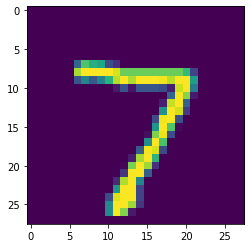

In [59]:
n = 0

# Display the image.
plt.imshow(X_test[n])

# Model prediction: probability for each class.
y_prob = model.predict(np.expand_dims(X_test[n], axis=0))
y_prob.round(3)

### The evaluation score is 88.8%, which is okay but not very impressive. Why? Can we improve the performance?

### Let's check how loss and accuracy have evolved over the training.

Text(0, 0.5, 'loss, validation loss')

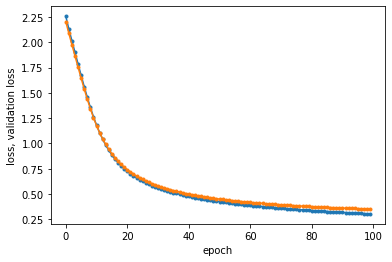

In [60]:
plt.plot(history.epoch, history.history['loss'],'.-')
plt.plot(history.epoch, history.history['val_loss'],'.-')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')

Text(0, 0.5, 'accuracy, validation accuracy')

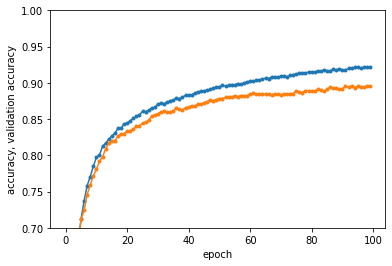

In [61]:
plt.plot(history.epoch, history.history['accuracy'],'.-')
plt.plot(history.epoch, history.history['val_accuracy'],'.-')
plt.ylim(0.7,1)
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')

### It seems like the model is still underfitting. We can increase the number of epochs, but we can try to use the "adam" optimizer which will monitor and adjust the learning rate as the training proceeds.

In [62]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [63]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_25 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_26 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [64]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

In [65]:
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
150/150 [==============================] - 2s 13ms/step - loss: 0.5046 - accuracy: 0.8375 - val_loss: 0.2799 - val_accuracy: 0.9075
Epoch 2/100
150/150 [==============================] - 2s 13ms/step - loss: 0.1862 - accuracy: 0.9413 - val_loss: 0.2343 - val_accuracy: 0.9308
Epoch 3/100
150/150 [==============================] - 2s 13ms/step - loss: 0.0936 - accuracy: 0.9704 - val_loss: 0.2413 - val_accuracy: 0.9308
Epoch 4/100
150/150 [==============================] - 2s 12ms/step - loss: 0.0625 - accuracy: 0.9806 - val_loss: 0.2730 - val_accuracy: 0.9233
Epoch 5/100
150/150 [==============================] - 2s 12ms/step - loss: 0.0589 - accuracy: 0.9829 - val_loss: 0.2718 - val_accuracy: 0.9308
Epoch 6/100
150/150 [==============================] - 2s 12ms/step - loss: 0.0335 - accuracy: 0.9877 - val_loss: 0.3172 - val_accuracy: 0.9258
Epoch 7/100
150/150 [==============================] - 2s 12ms/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.2641 - val_accuracy:

In [66]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.5944575071334839
Test accuracy: 0.9509999752044678


### Let's check how loss and accuracy have evolved over the training.

Text(0, 0.5, 'loss, validation loss')

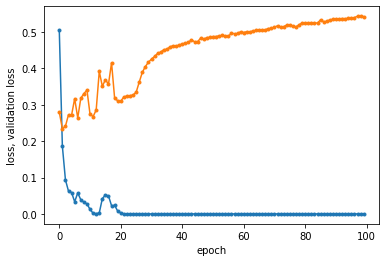

In [67]:
plt.plot(history2.epoch, history2.history['loss'],'.-')
plt.plot(history2.epoch, history2.history['val_loss'],'.-')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')

Text(0, 0.5, 'accuracy, validation accuracy')

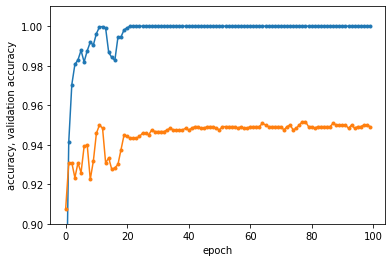

In [68]:
plt.plot(history2.epoch, history2.history['accuracy'],'.-')
plt.plot(history2.epoch, history2.history['val_accuracy'],'.-')
plt.ylim(0.9,1.01)
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')

### Adam optimizer turned out to be extremely efficient! That's good but in this case do we have to train the model for the entire 100 epochs?

### Early stopping

In [69]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [70]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

In [71]:
# The default monitor is "val_loss"
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

history2 = model2.fit(X_train, y_train, epochs=100,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
150/150 [==============================] - 2s 13ms/step - loss: 0.5114 - accuracy: 0.8381 - val_loss: 0.2888 - val_accuracy: 0.9100
Epoch 2/100
150/150 [==============================] - 2s 13ms/step - loss: 0.1778 - accuracy: 0.9431 - val_loss: 0.2182 - val_accuracy: 0.9325
Epoch 3/100
150/150 [==============================] - 2s 13ms/step - loss: 0.0915 - accuracy: 0.9702 - val_loss: 0.2537 - val_accuracy: 0.9292
Epoch 4/100
150/150 [==============================] - 2s 13ms/step - loss: 0.0810 - accuracy: 0.9740 - val_loss: 0.2460 - val_accuracy: 0.9358
Epoch 5/100
150/150 [==============================] - 2s 13ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.2825 - val_accuracy: 0.9325
Epoch 6/100
150/150 [==============================] - 2s 12ms/step - loss: 0.0470 - accuracy: 0.9842 - val_loss: 0.2718 - val_accuracy: 0.9358
Epoch 7/100
150/150 [==============================] - 2s 12ms/step - loss: 0.0257 - accuracy: 0.9929 - val_loss: 0.3209 - val_accuracy:

In [72]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.27958783507347107
Test accuracy: 0.9470000267028809


Text(0, 0.5, 'loss, validation loss')

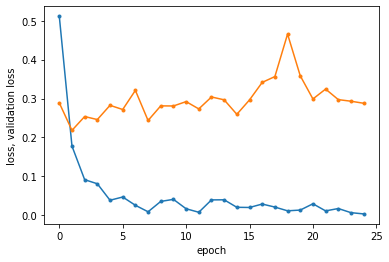

In [73]:
plt.plot(history2.epoch, history2.history['loss'],'.-')
plt.plot(history2.epoch, history2.history['val_loss'],'.-')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')

### TODO: With the "adam" optimizer and early stopping, we can train the model pretty efficiently. Now, let's use the entire MNIST dataset (instead of just 10 %) and see what accuracy we get.

In [76]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

In [77]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [78]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

In [79]:
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1950 - accuracy: 0.9409 - val_loss: 0.1273 - val_accuracy: 0.9606
Epoch 2/100
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0866 - accuracy: 0.9735 - val_loss: 0.1022 - val_accuracy: 0.9703
Epoch 3/100
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0586 - accuracy: 0.9805 - val_loss: 0.0957 - val_accuracy: 0.9742
Epoch 4/100
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0879 - val_accuracy: 0.9752
Epoch 5/100
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0951 - val_accuracy: 0.9777
Epoch 6/100
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.1099 - val_accuracy: 0.9749
Epoch 7/100
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1500/1500 [==============================] - 20s 13ms/step - loss: 0.0143 - accuracy: 0.9990 - val_loss: 0.6124 - val_accuracy: 0.9825


In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

### Q: What accuracy did you obtain? Are you satisfied?

### We can also take advantage of HiPerGator's A100 GPUs! You need to ask for a GPU when you open a session.

In [75]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### TODO: Repeat the above training using the full MNIST dataset and see how long (or short) it takes.

In [ ]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2)

### For fun, let's have a look at what some of the most widely-used neural networks look like. Here, we will check out the 101-layer residual network implemented into Keras.

In [189]:
model = keras.applications.ResNet101V2(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000
)


179527680/179518384 [==============================] - 2s 0us/step


In [190]:
model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_18[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________